# Encoding and Decoding for **letters pairs**

##About
---
There is a problem of decoding "encrypted" text, what based on the times number of  letter pairs of occur in "natural language text".


We already have **frequency**/**quantitativity** tables, so it's time to create functions for `encoding` and `decoding` text.

---
Є задача декодування "зашифрованого" тексту, яка базується на кількості частоти входжень пар літер в "natural language text".

Ми вже маємо частотні/кількісні таблиці, тому настав час створити функції для `кодування` та `декодування` тексту.



---
---
## Import & mount

In [2]:
import os
import re
import copy
import math
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import plotly.graph_objects as go

from sklearn.cluster import KMeans

# from mpl_toolkits.mplot3d import Axes3D

# plt.rcParams['figure.figsize'] = [15, 6]

In [3]:
# Mount GitHub
!git clone https://github.com/EdwardGerman/Columnar-Transposition-Cipher.git  # clone repository
%ls  # checking whether all files are present
drch = '/content/Columnar-Transposition-Cipher' # Path to data

folder_pp = 'Data_pp'
folder_ppt = 'Data_test_pp'
folder_pt = 'Parity_tables'

fatal: destination path 'Columnar-Transposition-Cipher' already exists and is not an empty directory.
Columnar-Transposition-Cipher/  sample_data/


In [ ]:
split_size = 23
folder = folder_pp
text_file = 'All texts_pp.txt'#'Robert_Burns_pp.txt'

# 'Computer_articles_pp.txt',
# 'Chat_comments_pp.txt',
# 'Jane_Eyre_pp.txt',
# 'Disturbed_Immortalized_pp.txt',
# 'Advanced_Literature_pp.txt',
# ,
# 'News_articles_pp.txt'

# 'All_texts_test_pp.txt'
# 'Chat_Comments_pp.txt' #All texts_pp

---
---
## Funcfions

In [ ]:
def display_df(df, name = True):
    pd.set_option('display.max_columns', None) # Print all rows (features) in DF
    if name == True and hasattr(df, 'name'): print(df.name + ':')
    display(df)
    print('\n')
    pd.reset_option('display.max_columns')     # Default setting: print print only first & final 5 rows


---
---
---
## Encoding

**`Encoding`** is the task of converting an initial text into a coded text. According to the task, the  initial text is written in a single line with only letters (all other characters, including spaces, are absent). Then the text is splitted into equal pieces of a certain size and written to a 'matrix'. After that, the columns of the matrix are shuffled. Next, the original single line structure of the text is restored.

**`Encoding`** - це задача перетворення початкового тексту в кодований. За умовою задачі, початковий текст записується в одит рядок тільки літерами (всі інші симіоли включно з пробілами відсутні). Потім текст розбивається на однакові шматки візначеного розміру і записується в 'матрицю'. Після чього стовпці матриці перемішуються. Далі відновлюється початкова структура тексту в один рядок.

Encoding procedure is following:
0. Read file for encoding and remove 'spaces' (after this step we have a text variable with one string)
1. Text *spliting* (`SplitText()` function)
2. Making *dict*, that contain *columns* of spliting text (`ColDict()` function)
3. *Shuffeling* of the columns - shuffling elements of the dict (`ShuffleDict()` function)
4. Reconctruction text stucture from the shuffled dictionary (`ShuffleDict_to_Text()` function)

!Note
> We combined the last 4 steps (functions) to one function, which doing *encoding procedure* - `EncodingText()`


##### Step 0.

Read text file:

In [ ]:
path_r = os.path.join(drch, folder, text_file)#All texts_pp
with open(path_r, 'r', errors='ignore') as file:
    text = file.read()

Take part of the text and remove 'spaces'

In [ ]:
text200 = text[:200]
print(text200)
text200_letters = text200.replace(' ', '')
print(text200_letters)
print(len(text200_letters))

genesis parashat bereishit the seven days of creation in the beginning god created the heavens and the earth now the earth was formless and empty with darkness over the surface of the deep and gods wi
genesisparashatbereishitthesevendaysofcreationinthebeginninggodcreatedtheheavensandtheearthnowtheearthwasformlessandemptywithdarknessoverthesurfaceofthedeepandgodswi
165


In [ ]:
# text2A = text# [:2000]
text_letters = text.replace(' ', '')
print('Len of preproc. text: ', len(text), '\nLen of text bli space: ',len(text_letters), sep='')

Len of preproc. text: 2263892
Len of text bli space: 1852581


##### Steps 1-4

**Step 1**: Function for `split` of a text on defined parts number
- Input arguments:
    - `text` - char variable with corresponding text
    - `n` - split size - number chars on part
- Ounput:
    - list of strings of length `n` (`*`)

`*` If number of chars in text not a multiple of `n`, last (not a complete) string is remove. This connected with problrm decision (`**`).

`**` We can, of course, add to the last string to make it complete, but that's another story)

In [ ]:
# Function for split of a text on defined parts number
def SplitText(text, n):
    return re.findall('.{' + str(n) + '}', text)

**Step 2**: Create dict with columns of a given text
- Input arguments:
    - `split_list` - list that contain fragmented text
- Ounput:
    - `col_dict` - dict that contain lists with 'columns' of fragmented text. ***keys*** of the dict corrspond to number of letters in the parted strings (started from `1` to `n`)

In [ ]:
# Create dict with columns of a given text
def ColDict(split_list):
    n = len(split_list[0])
    col_dict = {}
    for n in range(n):
        col_dict[n+1] = ''.join([row[n] for row in split_list])

    return col_dict

**Step 3**: Function that shuffle elements of dict ('columns').

How we do that:
the keys in our input dictionary are the sequence numbers (indexes) of the columns. We get key list and shuffle it. Shuffled list - is list, which contain new places (indexes) for columns. That is, the new list indicates where the corresponding column should move, for example:

Initial position | 1| 2| 3| 4| 5| 6|  7| 8|  9| 10
-----------------|--|--|--|--|--|--|---|--|---|---
New position     | 8| 4| 5| 1| 3| 9|  2| 6| 10|  7
Sorted position  | 4| 7| 5| 2| 3| 8| 10| 1|  6|  9

This means that the 1st column will move to the 8th position, the 2nd to the 4th position and so on.

`*` This 'unsorting' could be done in a different way, but it's clearer to me.


- Input arguments:
    - `col_dict` - list that contain fragmented text
    - `*p` - The possibility of printing information about shuffling to console (optional parameter, default `p = False`)
- Ounput:
    - `sorted_col_dict` - new dict with shuffled columns
    - list what contain information about shuffle

In [ ]:
def ShuffleDict(col_dict, p = False):
    key_list = list(col_dict)   # Initial key list (will be changed)
    old_list = key_list.copy()  # Copy of initial key list (for save)

    random.shuffle(key_list)    # Shuffle key list

    upd_col_dict = dict(zip(key_list, col_dict.values()))   # Change keys
    sorted_col_dict = dict(sorted(upd_col_dict.items()))    # Sorted dict by new keys

    # ---
    sorted_list = [x for _, x in sorted(zip(key_list, old_list))] # for print

    if p == True:
        print('Keys of the dict:      ', old_list)
        print('New (shuffle) position:', key_list)
        print('Sorted new keys:       ', sorted_list)

        print('Old dict:'), display(col_dict)
        print('Shuffled dict:'), display(upd_col_dict)
        print('Sorted shuffled dict:'), display(sorted_col_dict)

    return sorted_col_dict, [old_list, key_list, sorted_list]

Step 4: Function what transform dict with shuffled columns to text (char value). This function is inverse to `ColDict()` function.

- Input arguments:
    - `shuf_dict` - dict with shuffled columns
- Ounput:
    - `encoded_text` - encoded text

In [ ]:
def Dict_to_Text(col_dict):
    text_from_dict = ''
    values_list_of_col_dict = list(col_dict.values())

    for n in range(len(col_dict[1])):
        s = ''.join([col[n] for col in values_list_of_col_dict])

        text_from_dict = text_from_dict + s # + '\n'

    return text_from_dict

##### Combined function: unites steps 1-4

In [ ]:
def EncodingText(text, n, p = False):
    split_text = SplitText(text, n)     # Separate of text on lines of n characters each
    col_dict = ColDict(split_text)
    shuf_dict, lists = ShuffleDict(col_dict, p)
    encoded_text = Dict_to_Text(shuf_dict)
    return encoded_text, lists

In [ ]:
# split_size = 50
encoded_text, lists = EncodingText(text_letters, split_size)
old_pos, new_pos, sorted_pos = lists

print('Old position: ', old_pos, '\nNew position: ', new_pos,'\nSorted pos. : ', sorted_pos, sep='')
encoded_text

Old position: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
New position: [3, 22, 16, 4, 18, 5, 11, 8, 1, 2, 20, 9, 7, 19, 15, 12, 14, 10, 17, 23, 21, 6, 13]
Sorted pos. : [9, 10, 1, 4, 6, 22, 13, 8, 12, 18, 7, 16, 23, 17, 15, 3, 19, 5, 14, 11, 21, 2, 20]


'argeihhpsrsbietnesaaseindteeoseyevcnrfhasoaittinihbtngiceoedgtregnaneendeehnvaeahnethahdsttrthoheasralarnmoteefwswsthdpyrriaswetsnmotkdeeveohufghctpaeoedsarefdenshdidteavownhgiwvnrorseoferadeehrctseausfwtosgeralttehbttghhidaeledinghewstoigtlahwsehadttrasgegtvdaoowdignidhaoildghdtekrifeltnhmddhotreallegdatadgclyieshohedstrkatedsaeadenchdlhsnenlewithdersnentiehgtvangaorheaanmirsfyiarswgndetlepdaxhdteiepbroasetegnemaenadhdttotfeshiliwnetieadriedwldfeisanvtertgorwtaarmeetnhemeaddpoxidsndhtvdtiwiaeaedhewerercauredhnnpoaxwssetfherwmeaeceiatatswhbwhhvtoeahxadisdsnacsweoptnoegexaettneaahhheelvdspnleenewswgvnhedatneeaaierrassridogcyndsadopnneomgewalthehtdtuensdeeratirhesbgcdteeaoenoypetrakledaltrlhyptdaandpearaneogntadcsddslrelitwaoedhthynerdrnaaeighatdtaelhatnfhsswrleceaeolthedgesaangohdtwoiottaadawgssleddaehdttialreohsetigyrbdaseieynhddilrgsesegstrafursteiiaurednrbefngheifetktrirdswnattiiithonsdniethhirttaeaietdeneawstrhetdhealiseoyrgadiesebtiydesseeghdrnlfsandrerrdinskeierhbitaateitnrittwid

---
---
---
## Decoding

On this moment we have `encoded text` (in code as *variable*). We also have a set of `Parity Tables` - *quantitatibity*, *frequency*, *logaritmic* (see the corresponding notebook).

Decoding steps:
1. Preparation of `dict with columns`:
    - Split encoded text (to list)
    - Transform `list` to `dict`
2.  Parity Factor Table:
    - Load and correction `Parity Table`
    - Create `Parity Factor Table` by using `ParityFactor()` function
3. Correct order:
    - Geting `column pairs list`:
        - Sorting PFT by decreasing
        - Geting first `split_size - 1` elements from sorted series
        - Geting list of indexes from series - list of tuples. It is the `column pairs list`
    - Finding Correct order
4. Text recovery:
    - Recovery of column order (by function CorrectColDict())
    - Convertation orderly dict to text

### 1. Preparation of ***dict with columns***

In [ ]:
# Split encoded text. Use function SplitText() as well for initial text
split_encod = SplitText(encoded_text, split_size)
# display(split_encod)

In [ ]:
# Again repeat the action, as during edcoding: transform list to dict with columns.
encod_col_dict = ColDict(split_encod)
# encod_col_dict

### 2. **Parity Factor Table**

At first we must to download the ***Parity table***, namely `Logarithmic biased parity table`.

In [ ]:
# Load DataFrame (Parity Table) with pair coeficientes (`Log BQuant without spaces.csv`)
df_file = 'Log BQuant without spaces.csv'

path_pt = os.path.join(drch, folder_pt, df_file)
parity_table = pd.read_csv(path_pt)
parity_table.name = 'Logarithmic Parity Table'

# Rename indexes and columns (from '-a' & 'b-' to 'a' & 'b')
all_letters = [chr(i) for i in range(ord('a'), ord('z') + 1)]
parity_table.index = all_letters
parity_table.columns = all_letters

# display_df(parity_table)

#### Parity factor `function`

Here now we need calculate "`Parity factor`"
$$PF=\sum_{k=1}^{cs}log_{10}(PC_{l_1,l_2})$$
where
- $PF$ is a `parity factor`
- $cs = \frac{lt}{sps}$ - is a size of colomn
- $lt$ - length of the text
- $sps$ - split size

For this we have set of the `logarithmic` pair tables.
We will use `Logarithmic Biased Quantitativity table without spaces` ('Log BQuant without spaces.csv').

ParityFactor() function:
- Input arguments:
    - `df` - *DataFrame* with `log parity table`
    - `col_dict` - *dict* that contain colomns of encoded text
    - `col_pair` - *tuple* with `numbers` of columns in encoded text. Order matters!

- Ounput:
    - *`parity factor`* (for one column pair)

In [ ]:
def ParityFactor(df, col_dict, col_pair):
    column_size = len(col_dict[list(col_dict.keys())[0]])
    first_column =  col_dict[col_pair[0]]
    second_column = col_dict[col_pair[1]]

    return sum([df[second_column[k]][first_column[k]] for k in range(column_size)])

#### Parity Factor Table (PFT)

This function create `table` wich `parity factors` all column pairs in encoding text.

(It is easier to create such a table at once, than to calculate the parity factor each time when sorting)

ParityFactorTable() function:
- Input arguments:
    - `encod_col_dict` - *dict* that contain colomns of encoded text

- Ounput:
    - `PFT` - *DataFrame* that contaiin `Parity Factor Table`

In [ ]:
def ParityFactorTable(encod_col_dict):
    split_size = len(encod_col_dict)

    PFT = pd.DataFrame(0, index=range(1,split_size+1), columns=range(1,split_size+1))

    PFT = PFT.rename_axis('First column')
    PFT = PFT.rename_axis('Second column', axis='columns')

    for p in range(1, split_size+1):
        list_other = list(range(1,split_size+1))
        list_other.remove(p)

        for q in list_other:
            PFT.at[p,q] = ParityFactor(parity_table, encod_col_dict, (p,q))
    return PFT

In [ ]:
PFT = ParityFactorTable(encod_col_dict)
display(PFT)

Second column             1              2              3              4   \
First column                                                                
1                   0.000000  300067.735930  259341.096192  259561.184953   
2              268405.315943       0.000000  259175.743519  259272.254288   
3              259204.048656  259469.751105       0.000000  256404.885580   
4              259858.908016  259012.601294  258222.387864       0.000000   
5              256194.545199  259414.810290  259574.605134  259689.509914   
6              259272.747599  259660.717604  259147.778433  259511.853148   
7              258633.117888  258531.712101  259169.331131  259336.851908   
8              299984.829792  257596.662505  259267.333377  258677.216869   
9              258424.346899  259746.671548  259085.098862  259364.818651   
10             259171.236384  259712.182501  259182.955902  259444.384940   
11             257360.004700  257336.967762  258884.942240  258647.625614   
12             258880.162008  259324.316355  259541.819024  259125.683309   
13             259087.727057  259242.938394  258728.647417  258841.350174   
14             258623.059029  259102.710078  258879.094698  259213.708711   
15             259030.933759  260186.937468  259092.885667  259351.744922   
16             259006.454917  258768.035986  260042.612383  300036.977004   
17             258690.484972  259856.476154  259314.378132  258988.803068   
18             259827.708827  259796.321436  258479.703095  268233.924165   
19             259234.517850  258696.176984  259217.195195  259216.498707   
20             259631.279952  268439.261220  259082.668079  259080.276643   
21             258953.457846  259261.830552  259299.622232  259158.700563   
22             258618.035055  259431.075471  268496.133855  257179.138689   
23             259357.816933  259010.784856  259628.747863  259469.479205   

Second column             5              6              7              8   \
First column                                                                
1              258533.670116  259162.583485  259757.451511  268637.653777   
2              258327.167544  259805.653312  256761.032536  260065.157382   
3              259241.905771  258920.375549  259258.601133  259194.782733   
4              257301.039579  259196.156485  258692.351818  259955.763219   
5                   0.000000  258942.146351  258450.895764  257286.071588   
6              258988.468925       0.000000  259257.364878  259452.413400   
7              258632.481159  259145.360070       0.000000  259361.032331   
8              259863.892505  259416.210941  259556.845807       0.000000   
9              258892.714540  258463.661974  299841.023741  258060.187094   
10             259055.049006  259503.345968  260170.032455  258976.625338   
11             268380.479372  259358.627373  258501.315365  300174.897776   
12             259165.300738  258876.292008  258675.543094  259830.596763   
13             258596.183536  268402.202713  258924.189414  259044.715938   
14             259168.671294  259994.895766  258085.219447  259331.227978   
15             259151.325693  259011.433401  259343.041208  258523.444693   
16             256472.534589  259133.405140  259257.939758  259186.570215   
17             259122.761386  256553.585960  258775.136514  259195.683662   
18             299752.230055  259181.193775  259118.868352  256603.668866   
19             258979.986170  259241.465351  267904.821916  259178.575032   
20             259087.561590  258683.046001  257073.329859  258533.101305   
21             258807.895041  299902.179597  258955.305929  259537.671822   
22             259399.852975  259279.311999  259078.515144  258703.956082   
23             259153.779577  257683.412768  259165.416807  259197.669263   

Second column             9              10  ...             14  \
First column                                 ...                  
1             

---
### Visualization

2D and 3D

##### 2D: Heatmap

In [ ]:
def PFT_Heatmap(PFT, figsize=(20, 15), cmap='coolwarm', font_size = 8, fmt='.2f'):

    sns.set()
    plt.figure(figsize=figsize)

    ax = sns.heatmap(PFT, annot=True, fmt=fmt, cmap=cmap,  cbar=False,#
                        annot_kws={'size': font_size}) # YlGnBu viridis
                        # fmt: # 'd' # '.2f' # '.0f' # '.2g'

    ax.xaxis.tick_top()     # axis ticks on top
    plt.yticks(rotation=0)  # rotate of axis ticks

    font_t = {'family': 'serif', 'color':  'darkred', 'weight': 'bold', 'size': 18,}
    font_l = {'family': 'serif', 'weight': 'bold', 'size': 10,}

    # Title, xlabel, ylabel:
    plt.text(0.5, 1.13, 'Parity Factor Table', ha='center', transform=ax.transAxes, fontdict=font_t)
    plt.text(0.5, 1.08, 'Second (right) column in pair', ha='center', transform=ax.transAxes, fontdict=font_l)
    plt.ylabel('First (left) column in pair', fontdict=font_l)
    plt.show() # Show heatmap

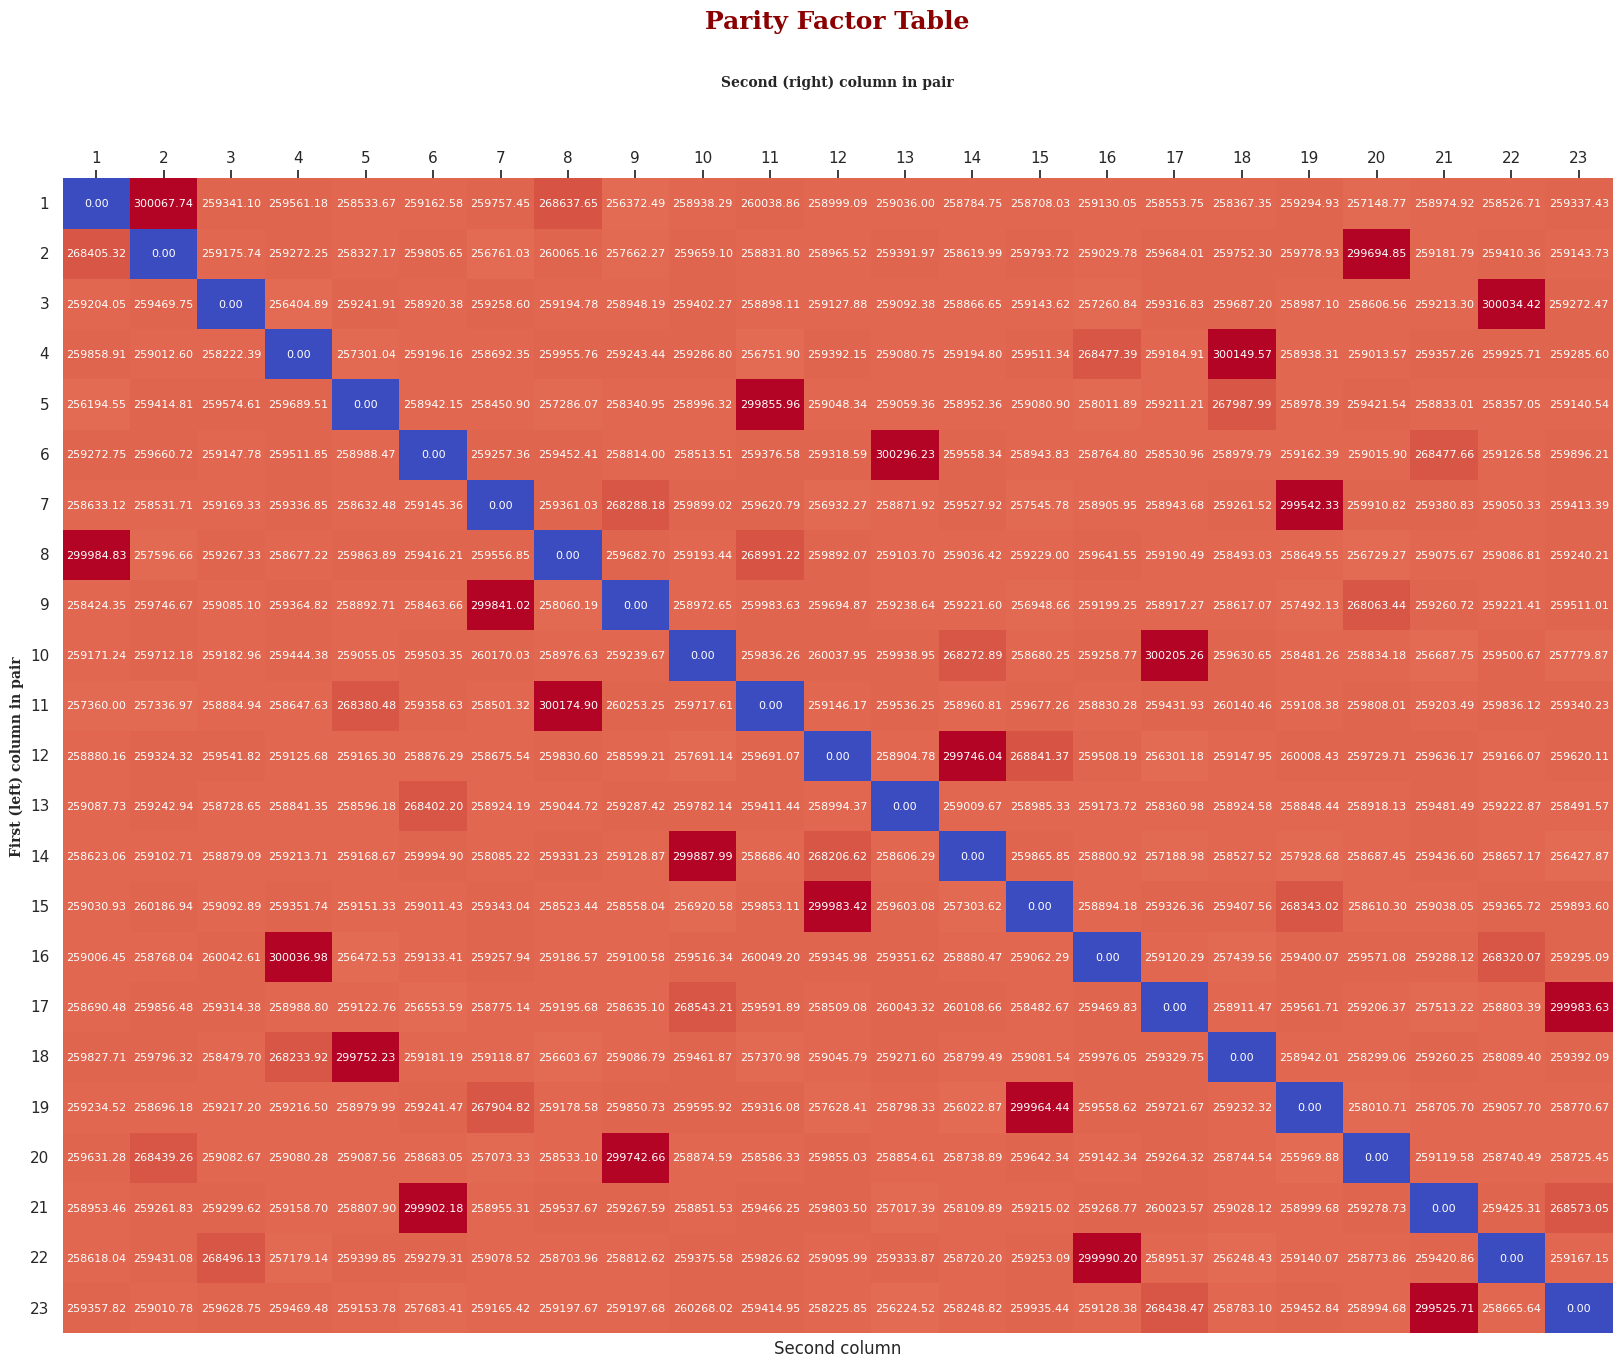

In [ ]:
PFT_Heatmap(PFT)

##### 3D
- 3D histogram
- Sufface by `mathplotlib`
- Sufface by `plotly` (with possibility of rotation)

For userful of visualization, function includes the `lower` parameter - there is coefficient for the `smallest non-zero` value by which we replace the `zero values`:
$$0\to lower * \text{min}(NonZero(PFT))$$

In [ ]:
def PFT_3D(df, type3d = 'hist', figsize=(16,12), lower=None, elev=20, azim=30):

    title_name = 'Parity Factor Table'
    font_t = {'family': 'serif', 'color':  'darkred', 'weight': 'bold', 'size': 24,}

    x = df.index.tolist()
    y = df.columns.tolist()
    X, Y = np.meshgrid(x, y)        # Set meshgrid

    if lower is not None:
        df = df.replace(0, df[df != 0].stack().min()*lower)


    if type3d == 'hist':
        colormap=cm.viridis;# elev=20; azim=30;
        Z = df.values

        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, projection='3d')  # Making 3D axes
        colors = colormap(Z.flatten() / Z.max())    # Set different bar colors depend on bar height

        X = X.flatten()
        Y = Y.flatten()
        dx = dy = 0.8
        dz = Z.flatten()

        ax.bar3d(X, Y, np.zeros_like(dz), dx, dy, dz, shade=True, color=colors)# Build 3D hist

        ax.view_init(elev=elev, azim=azim)          # Tune of the graph rotate
        ax.set_title(title_name, fontdict=font_t)
        ax.set_xticks(x);   ax.set_xticklabels(x)
        ax.set_yticks(y);   ax.set_yticklabels(y)

        plt.show()

    if type3d == 'mpl':
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, projection='3d')

        ax.plot_surface(X, Y, df.values)
        ax.set_title(title_name, fontdict=font_t)
        ax.view_init(elev=elev, azim=azim)

        plt.show()

    if type3d == 'plotly':
        z = df.values
        fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
        fig.update_layout(title=title_name,
                          title_font=dict(family='Arial', size=24, color='darkred'),
                          autosize=False, width=1000, height=1000,
                          margin=dict(l=65, r=50, b=65, t=90))
        fig.show()

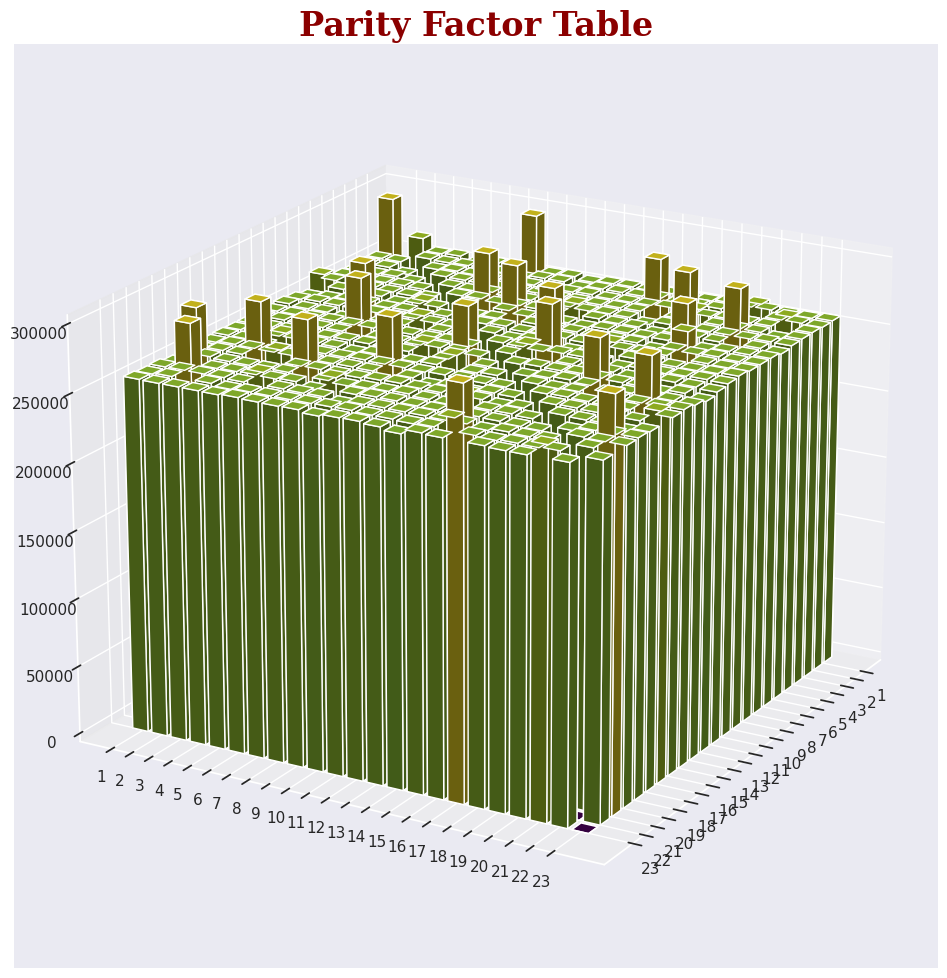

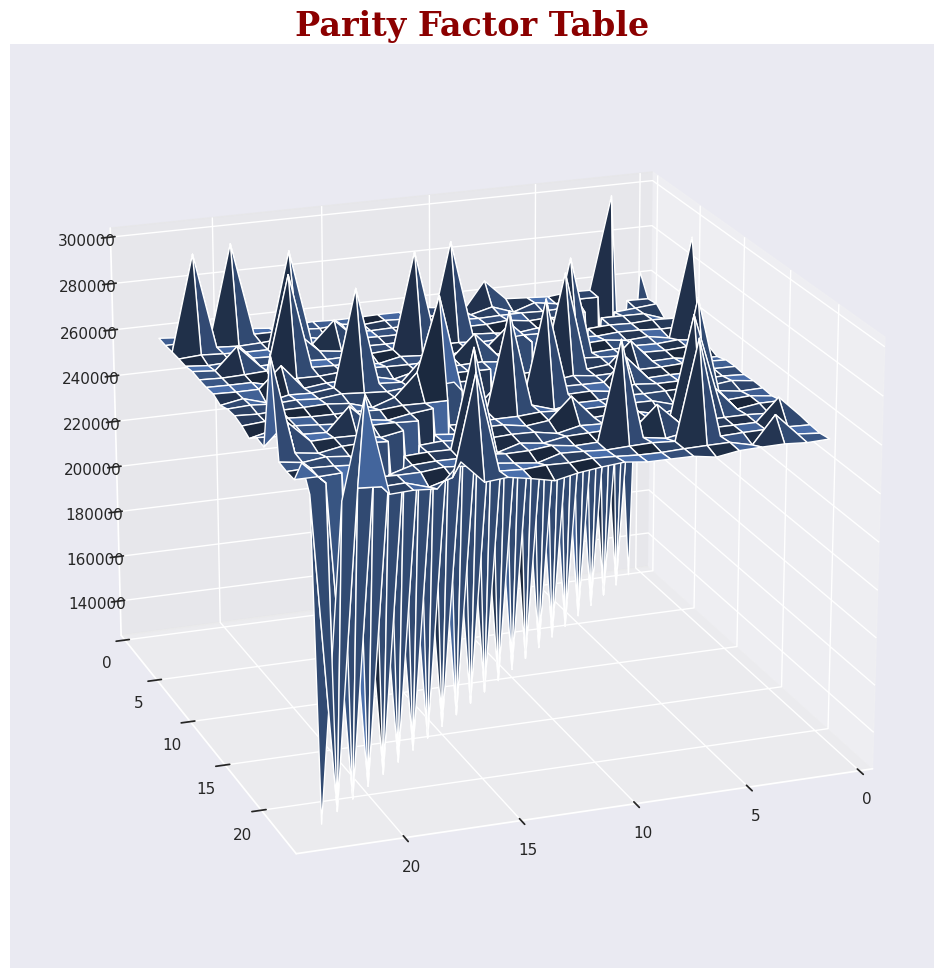

In [ ]:
PFT_3D(PFT, type3d = 'hist', figsize=(16,12))
PFT_3D(PFT, type3d = 'mpl', figsize=(16,12), lower = 0.5, elev=20, azim=70)
PFT_3D(PFT, type3d = 'plotly', figsize=(16,12), lower = 0.9)

---
### Data analysis

In [ ]:
# top_largest = PFT.unstack().nlargest(split_size)
PFT_all_high_to_low = PFT.unstack().nlargest(PFT.size)
pd.DataFrame(PFT_all_high_to_low)

0
Second column First column               
13            6             300296.231276
17            10            300205.259298
8             11            300174.897776
18            4             300149.569022
2             1             300067.735930
...                                   ...
17            17                 0.000000
18            18                 0.000000
19            19                 0.000000
20            20                 0.000000
23            23                 0.000000

[529 rows x 1 columns]

In [ ]:
PFT_split_size_high_to_low = PFT.unstack().nlargest(split_size)
pd.DataFrame(PFT_split_size_high_to_low)

0
Second column First column               
13            6             300296.231276
17            10            300205.259298
8             11            300174.897776
18            4             300149.569022
2             1             300067.735930
4             16            300036.977004
22            3             300034.422897
16            22            299990.202846
1             8             299984.829792
23            17            299983.631637
12            15            299983.417932
15            19            299964.440502
6             21            299902.179597
10            14            299887.993759
11            5             299855.959598
7             9             299841.023741
5             18            299752.230055
14            12            299746.042119
9             20            299742.656215
20            2             299694.850264
19            7             299542.334390
21            23            299525.711535
11            8             268991.222219

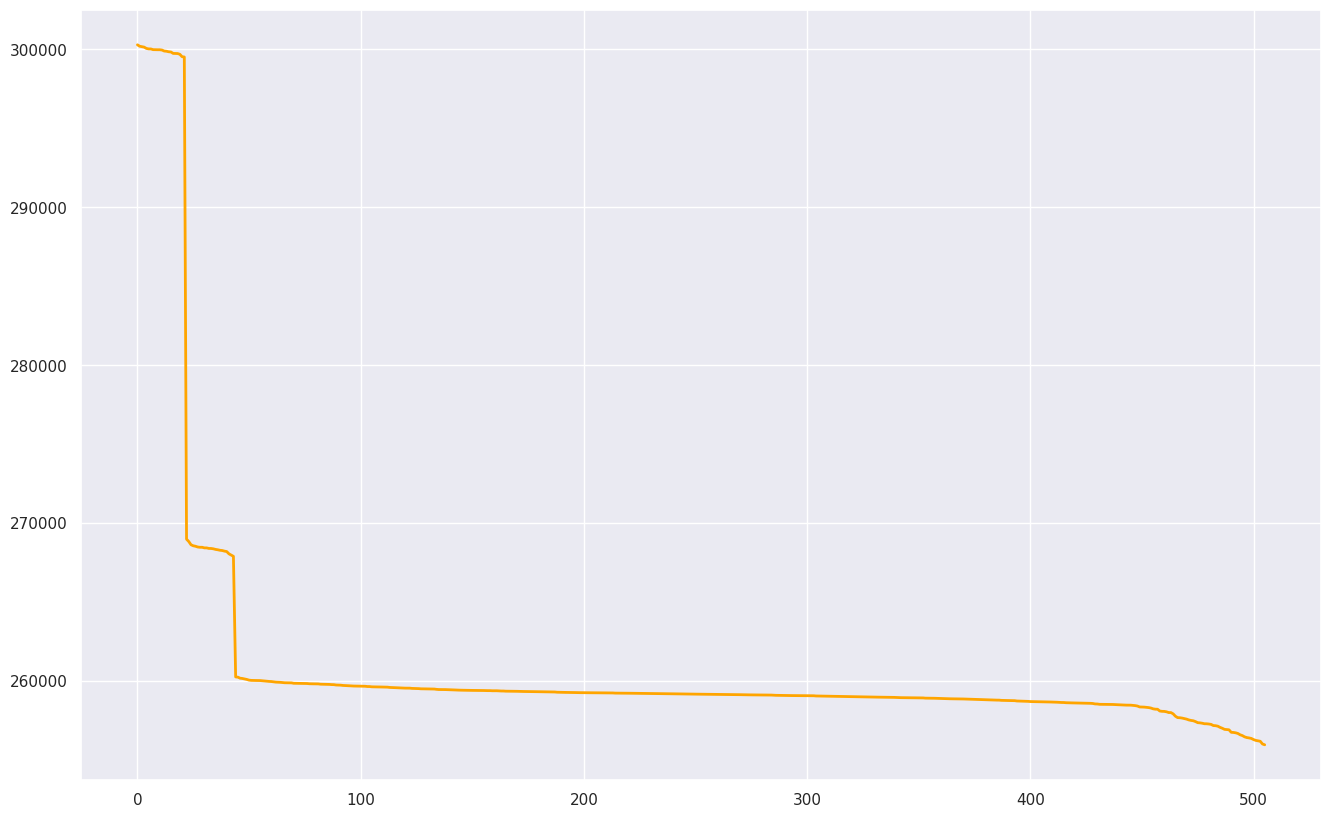

In [ ]:
# sort the values by top largest
sorted_pf_values = PFT.stack().sort_values(ascending=False)
# *Note! Type of `sorted_values` is a 'pandas.core.series.Series' -> print(type(sorted_values))
#        Type of `sorted_values.values` is a 'numpy.ndarray' -> print(type(sorted_values.values))


# remove values that equal to 0 (it`s values on main diagonal)
sorted_pf_values = sorted_pf_values.values[:-split_size]

plt.figure(figsize=(16,10))
plt.plot(sorted_pf_values, '-',c = 'orange', linewidth = 2)
plt.show()

#### Determine the number of clusters.

Elbow Method

**`WCSS`** (*Within-Cluster Sum of Squares*) is a metric used to evaluate the quality of data clustering by `KMeans`. This metric measures how close each sample in the cluster is to the cluster centroid, i.e. how well the samples in the cluster are grouped around their central value.

WCSS або Within-Cluster Sum of Squares (внутрішня сума квадратів відстаней до центроїду) - це метрика, яка використовується для оцінки якості кластеризації даних методом KMeans. Ця метрика вимірює, наскільки кожен зразок в кластері близько до центроїду кластера, тобто як добре зразки в кластері згруповані навколо свого центрального значення.

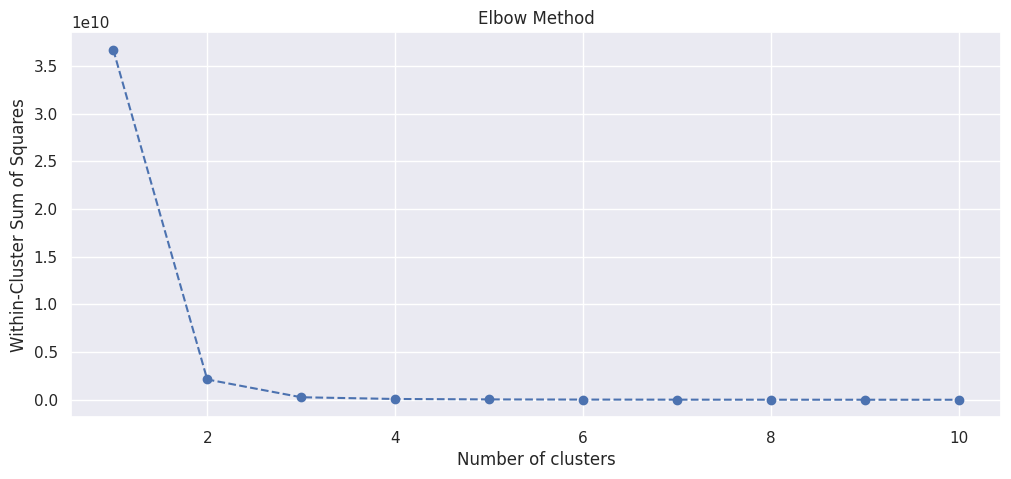

In [ ]:
# Converting a `sorted_pf_values` to a format that accept for classifier
sva_data = np.array(sorted_pf_values).reshape(-1, 1) # sva - from 'sorted values array'

wcss = [] # List of the `Within-Cluster Sum of Squares` to centroid

# Determining the optimal number of clusters using the Elbow Method
max_clusters = 10
for i in range(1, max_clusters+1):  # testing from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=20) #, random_state=42
    kmeans.fit(sva_data)
    wcss.append(kmeans.inertia_)

# Plotting graph
plt.figure(figsize=(12, 5))
plt.plot(range(1, max_clusters+1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

**Silhouette method** (see [1](https://en.wikipedia.org/wiki/Silhouette_(clustering)), [2](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html))

This method use the `silhouette score metric` to evaluate the quality of clustering for different values of `k`. It measures how well each object fits into its cluster compared to other clusters. Choosing `k` that has the *highest average silhouette score* can be considered optimal.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

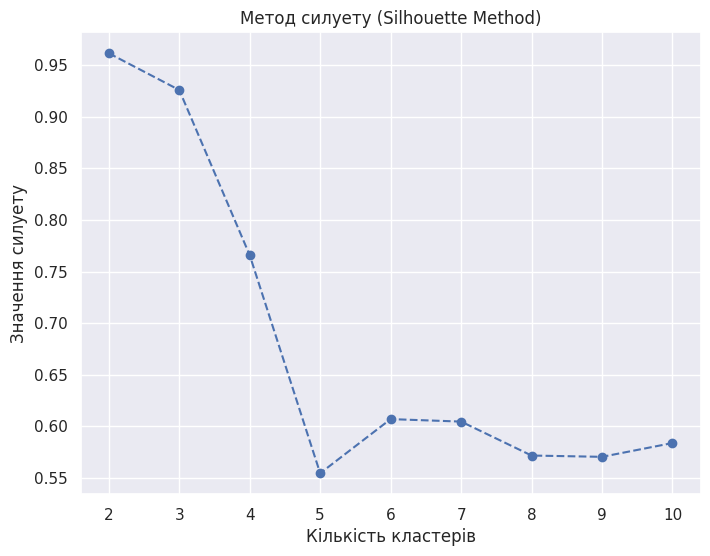

In [ ]:
from sklearn.metrics import silhouette_score

sva_data = np.array(sorted_pf_values).reshape(-1, 1)

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(sva_data)  # Data conversion to (-1, 1) format
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(sva_data, labels))

# Graphic of silhouette values for different numbers of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Value of the silhouette')
plt.title('Silhouette Method')
plt.grid(True)
plt.show()


#### Clasterisation

##### K-means

In [ ]:
num_clusters = 6  # User defined

# K-means for clustering:
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=20) # , random_state=42
kmeans.fit(sva_data)

labels = kmeans.labels_ # Get cluster labels
print('Cluster labels:\n',labels, sep='')

Cluster labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 

In [ ]:
def GetNewLabels(labels):
    list_labels = labels.tolist()
    list_new_labels = []
    for l in range(len(set(list_labels))):
        n = list_labels.count(list_labels[0])
        list_new_labels = list_new_labels + [l] * n
        list_labels = list_labels[n:]

    return np.array(list_new_labels)

new_labels = GetNewLabels(labels)
new_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

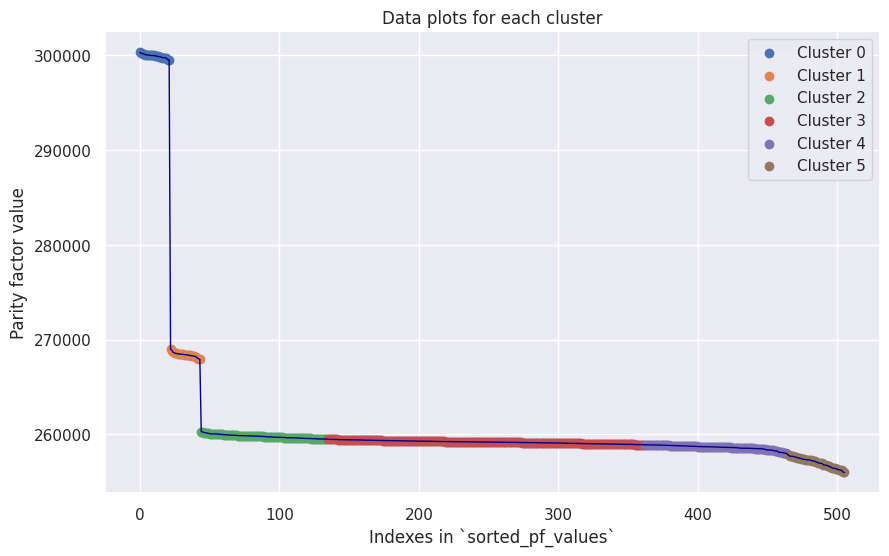

In [ ]:
indices = np.arange(len(sorted_pf_values))

# Separation of data into clusters
clustered_data = {i: [] for i in range(num_clusters)}
for i, label in enumerate(new_labels):
    clustered_data[label].append(sorted_pf_values[i])


# Show data plots for each cluster
plt.figure(figsize=(10, 6))
for cluster, values in clustered_data.items():
    plt.scatter([indices[i] for i in range(len(sorted_pf_values)) if new_labels[i] == cluster],
                values, label=f'Cluster {cluster}')

plt.plot(sorted_pf_values, '-', c = 'darkblue', linewidth = 1)#

plt.xlabel('Indexes in `sorted_pf_values`')
plt.ylabel('Parity factor value')
plt.title('Data plots for each cluster')
plt.legend()
plt.show()

In [ ]:
# Obtaining unique values of the label array and their quantities
unique_labels, counts = np.unique(new_labels, return_counts=True)

# Print of the number of elements for each class
for label, count in zip(unique_labels, counts):
    print('Cluster ', label, ': ',count, ' elements', sep='')


Cluster 0: 22 elements
Cluster 1: 22 elements
Cluster 2: 91 elements
Cluster 3: 227 elements
Cluster 4: 103 elements
Cluster 5: 41 elements


#####Mean Shift

In [ ]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(sva_data, quantile=0.2)  # Tune the 'quantile' parameter to fit your data set
print("Approximate optimal value of 'bandwidth':", bandwidth)

Приблизне оптимальне значення bandwidth: 2469.6410408447073


In [ ]:
from sklearn.cluster import MeanShift

# Definition and training of the Mean Shift model
mean_shift = MeanShift(bandwidth=2100)
mean_shift.fit(sva_data)

# Obtaine cluster labels and cluster centers
labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_

# Print of the number of clusters and their centers
num_clusters = len(np.unique(labels))
print(f"Clusters found: {num_clusters}")
print("Centers of clusters:")
for center in cluster_centers:
    print(center[0])  # Print the coordinates of the cluster centers (in this case, 1D)
labels

Знайдено кластерів: 3
Центри кластерів:
259082.62383557105
299925.5725993871
268396.5624874544


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

---
### 3. Correct order

Based on graphical analysis, we can identify all correct column pairs. Their number is equal to `split_size-1`. Therefore, let's order the `PFT` in descending and take the first `split_size-1` elements.

Виходячі з графічного аналізу, ми можемо визначити всі правильні пари стовпців. Іх кількість дорівнює `split_size-1`. Тому впорядкуємо `PFT` за зменшенням і візьмемо перші `split_size-1`.

>!Note. `PFT_top_largest` is ***series*** with double indexation.

But for following we need just indexes (more precisely, their combination) - `column_pairs_list`. Is the list of tuples. Each tuple is a correct column pair, whete 1st element - index of a right (second) column in pair, and 2nd element - index of a left (first) column in pair.

In [ ]:
PFT_top_largest = PFT.unstack().nlargest(split_size-1)
pd.DataFrame(PFT_top_largest)

0
Second column First column               
13            6             300296.231276
17            10            300205.259298
8             11            300174.897776
18            4             300149.569022
2             1             300067.735930
4             16            300036.977004
22            3             300034.422897
16            22            299990.202846
1             8             299984.829792
23            17            299983.631637
12            15            299983.417932
15            19            299964.440502
6             21            299902.179597
10            14            299887.993759
11            5             299855.959598
7             9             299841.023741
5             18            299752.230055
14            12            299746.042119
9             20            299742.656215
20            2             299694.850264
19            7             299542.334390
21            23            299525.711535

In [ ]:
column_pairs_list = PFT_top_largest.index.tolist()
column_pairs_list

[(13, 6),
 (17, 10),
 (8, 11),
 (18, 4),
 (2, 1),
 (4, 16),
 (22, 3),
 (16, 22),
 (1, 8),
 (23, 17),
 (12, 15),
 (15, 19),
 (6, 21),
 (10, 14),
 (11, 5),
 (7, 9),
 (5, 18),
 (14, 12),
 (9, 20),
 (20, 2),
 (19, 7),
 (21, 23)]

Function `CorrectOrder()` restores initial order columns in text.


At this moment we have `Parity Factor Table`. From the visualization of this table, we can see that we have several "peaks" of approximately the same height. Their number is equal to the number of consecutive column pairs in the text. That is, if our text is splitted into **20** columns (`split_size = 20`), then these "peaks" will be **19** (`split_size -1 = 19`). Thus, these peaks correspond to the correct order in column matrix.

Also from this table, we have a 'series' ordered in descending, whose indices are the correct sequence of column pairs (see above). From this 'series', we only need the first split_size -1 elements. If look closely at the index list of of the defined elements (CPL - column pairs list) (also see above), you will notice that all values are repeated twice: once in the first column, and once in the second column. Except for the two values that correspond to the first and last columns of the initial text.

On this moment we have `Parity Factor Table`.
З візуалізації таблиці бачимо, що в нас є декілька "пиків" приблизно однакової висоти. Їх кількість дорівнює кількості послідовних пар стовпців в тексті. (Тобто, якщо в нас текст розбитий на 20 колонок - `split_size = 20`, то цих "піків" буде `split_size -1 = 19`). Таким чином ці пики відповідають правильному порядку стовпців тексту.

Також з цієї таблиці ми маємо 'серію' впорядковану за зменшенням, індекси якої є правильною послідовністю пар стовпців (дивись вище). З цієї "серії" нам потрібно тільки *перші* `split_size -1` елементів. Якщо уважно подивитись на список індексів портібних елементів (також дивись вище), то помітимо, що всі значення повторюються двічі: один раз в першому стовпчіку, другий - у другому. Окрім двох значень, які відповідають першому та останньому стовпчикам початкового тексту.


In [ ]:
def CorrectOrder(column_pairs_list, p = False):
    first_column = {y for x, y in column_pairs_list} - {x for x, y in column_pairs_list}
    correct_order = [first_column.pop()]

    res = 0 # parameter of the end of loop
    while res is not None:
        res = next((i for i, tpl in enumerate(column_pairs_list) if tpl[1] == correct_order[0]), None)
        if res is not None:
            correct_order.insert(0, column_pairs_list[res][0])
            if p == True: print(res, column_pairs_list[res], correct_order)

    correct_order = correct_order[::-1]

    return correct_order

In [ ]:
correct_order = CorrectOrder(column_pairs_list, p = True)

6 (22, 3) [22, 3]
7 (16, 22) [16, 22, 3]
5 (4, 16) [4, 16, 22, 3]
3 (18, 4) [18, 4, 16, 22, 3]
16 (5, 18) [5, 18, 4, 16, 22, 3]
14 (11, 5) [11, 5, 18, 4, 16, 22, 3]
2 (8, 11) [8, 11, 5, 18, 4, 16, 22, 3]
8 (1, 8) [1, 8, 11, 5, 18, 4, 16, 22, 3]
4 (2, 1) [2, 1, 8, 11, 5, 18, 4, 16, 22, 3]
19 (20, 2) [20, 2, 1, 8, 11, 5, 18, 4, 16, 22, 3]
18 (9, 20) [9, 20, 2, 1, 8, 11, 5, 18, 4, 16, 22, 3]
15 (7, 9) [7, 9, 20, 2, 1, 8, 11, 5, 18, 4, 16, 22, 3]
20 (19, 7) [19, 7, 9, 20, 2, 1, 8, 11, 5, 18, 4, 16, 22, 3]
11 (15, 19) [15, 19, 7, 9, 20, 2, 1, 8, 11, 5, 18, 4, 16, 22, 3]
10 (12, 15) [12, 15, 19, 7, 9, 20, 2, 1, 8, 11, 5, 18, 4, 16, 22, 3]
17 (14, 12) [14, 12, 15, 19, 7, 9, 20, 2, 1, 8, 11, 5, 18, 4, 16, 22, 3]
13 (10, 14) [10, 14, 12, 15, 19, 7, 9, 20, 2, 1, 8, 11, 5, 18, 4, 16, 22, 3]
1 (17, 10) [17, 10, 14, 12, 15, 19, 7, 9, 20, 2, 1, 8, 11, 5, 18, 4, 16, 22, 3]
9 (23, 17) [23, 17, 10, 14, 12, 15, 19, 7, 9, 20, 2, 1, 8, 11, 5, 18, 4, 16, 22, 3]
21 (21, 23) [21, 23, 17, 10, 14, 12, 15, 19, 

In [ ]:
print('Correct order:   ', correct_order)
print('Shuffle position:', new_pos)

if correct_order == new_pos: print('All right! Order recovered!!!')
else: ('Ooops... There`s a fail(')

Correct order:    [3, 22, 16, 4, 18, 5, 11, 8, 1, 2, 20, 9, 7, 19, 15, 12, 14, 10, 17, 23, 21, 6, 13]
Shuffle position: [3, 22, 16, 4, 18, 5, 11, 8, 1, 2, 20, 9, 7, 19, 15, 12, 14, 10, 17, 23, 21, 6, 13]
All right! Order recovered!!!


### 4. Text recovery

In [ ]:
def CorrectColDict(encod_col_dict, correct_order):
    decod_col_dict = {}
    for n, ncol in enumerate(correct_order):
        decod_col_dict[n+1] = encod_col_dict[ncol]
    return decod_col_dict
decod_col_dict = CorrectColDict(encod_col_dict,correct_order)
decod_col_dict

{1: 'gtidodhdeaeedeaihpaerscmhaesasanynaddaiswsrnfhntehmgafhetadetnneedrmisaanrrctbhhuimwreclarmaeehgagtebrtenahleelehhvegntrwrvtnteailensdeihfdtssdsacolhelrautfosoliaewgrtoetdnmfrwlrnatewflaroticemeiioommovvbetinloemtstouadatoodhahhmateottaraiwrhsnetntilietdeiehhyhecdhehshraatesatdnehssddeoteyostaaurhpieoysuoirfmistwtheoashorthwfdovedhocrtdakiahveehttmleddaoyaasiotoswaboltrdemeoyuuegeybufhatmtaarfinowatlreblutaehftoshhgsehachgmvthsosdnstdhfaiemoahniesrhltevhvsenrnnaedningisnannirueoyusnrernsaiyehtafnlneilvenaeicycoldchetghedrmgewgfochesdwyhtiynvrialedtmtotaenafaltaehgwrpeseenltyhaieethaswflarhsfnivmsehrhtfetpesmoiftlholerseenkesaseayvwcrndwhsvtmsstdaeehhnmfwwnadhhfiaedcstoeimlgrotpppeititaeadeeryslbodsuitheteotaiidausantryttdodtnheoecahdtwsehheeahaatcletfaotnyiernaomdsgurunscttiaawhpatoarctlrrgefyanrruneauarnrgaevsrttoyhlnneahhdnltsyydehaleiicshdhantpritwoaovnteoawenitthafeojcshddkwnaeootakitshuslibtowciaadweahrtuotaitiortzshsureheaognathntzuhcenhshhefernogmshahheensahalrhoisazaalaets

In [ ]:
decoded_text = Dict_to_Text(decod_col_dict)
decoded_text

'genesisparashatbereishitthesevendaysofcreationinthebeginninggodcreatedtheheavensandtheearthnowtheearthwasformlessandemptywithdarknessoverthesurfaceofthedeepandgodswindwashoveringoverthesurfaceofthewatersgodsaidlettherebelightandtherewaslightgodsawthatthelightwasgoodandgoddividedthelightfromthedarknessgodcalledthelightdayandthedarknesshecallednighttherewaseveningandtherewasmorningafirstdaypgodsaidlettherebeanexpanseinthemiddleofthewatersandletitdividewaterfromwatergodmadetheexpanseanddividedthewaterwhichwasundertheexpansefromthewaterwhichwasabovetheexpanseanditwassogodcalledtheexpanseheaventherewaseveningandtherewasmorningaseconddaypgodsaidletthewatersundertheskybegatheredtooneplaceandletthedrylandappearanditwassogodcalledthedrylandearthandthegatheringofthewatershecalledseasandgodsawthatitwasgoodgodsaidlettheearthyieldgrassherbsyieldingseedandfruittreesbearingfruitaftertheirkindwithitsseedinitontheearthanditwassotheearthyieldedgrassherbsyieldingseedaftertheirkindandtreesbearingfruitwit

---
---
---
#!

---
Little note about lenght of a text.
1. If by the problem condition,  the split size is known then the number of letters in the coded text must be a multiple of this value.
2. If the split size is unknown, then it can be determined by the multiple of the text length value (reduce the search options). Therefore, the text should not be truncated, but it is better to bring its length to the nearest simple value.
PS. In our problem, the split size is known.



1. Якщо за умовою задачу зазделегіть відомо розмір спліту, то кількість букв в кодованому тексті повинні бути кратні цьому значенню.
2. Якщо розмір спліту невідомий, то по кратності значення довжини тексту можна його визначити (зменшити варіанти пошуку). Тому текст не треба обрізати, а краще довести його довжину до найближчого простого значення.
PS. В нашій задачі розмір спліту відомий.

---
Alternative notation of ParityFactor function. It is shorter, but less readable.

In [ ]:
# def ParityFactor(df, first_column, second_column):
#     column_size = len(first_column)
#     return sum([df[second_column[k]][first_column[k]] for k in range(column_size)])

Alternative notation of function for cluster labels replacement

In [ ]:
# def NewLabels(data, labels):

#     unique_labels = np.sort(np.unique(labels)) # Sorted unique labels
#     mean_values = [np.mean(data[labels == label]) for label in unique_labels] # mean values for each cluster
#     sorted_unique_labels = unique_labels[np.argsort(mean_values)[::-1]]# Sorted unique labels by descending `mean values`
#     label_mapping = dict(zip(sorted_unique_labels, unique_labels)) # Mapping old labels to new
#     new_labels = [label_mapping[label] for label in labels] # Replacement of old labels with new ones
#     return new_labels

# new_labels = NewLabels(sva_data, labels)

Alternative notation of `Correct Order` function (1st variant)

In [ ]:
# def CorrectOrderV1(column_pairs_list, p = False):
#     correct_order = list(column_pairs_list[0])

#     res = 0 # parameter of the end of loop
#     while res is not None:
#         res = next((i for i, tpl in enumerate(column_pairs_list) if tpl[0] == correct_order[-1]), None)
#         if res is not None:
#             correct_order.append(column_pairs_list[res][1])
#             if p == True: print(res, column_pairs_list[res], correct_order)

#     res = 0 # parameter of the end of loop
#     while res is not None:
#         res = next((i for i, tpl in enumerate(column_pairs_list) if tpl[1] == correct_order[0]), None)
#         if res is not None:
#             correct_order.insert(0, column_pairs_list[res][0])
#             if p == True: print(res, column_pairs_list[res], correct_order)

#     correct_order = correct_order[::-1]

#     return correct_order

# correct_orderV1 = CorrectOrderV1(column_pairs_list)
# print(correct_orderV1)
# print(lists[1])